## Prevendo a Ocorrência de Diabetes
# Dataset Kaggle

Disciplina Linguagens de Programação

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #nivel de exatidao do meu algoritmo
from sklearn.naive_bayes import GaussianNB
from google.colab import drive
from sklearn import metrics #nivel de exatidao do meu algoritmo
from sklearn.ensemble import RandomForestClassifier #metodo ensemble


df = pd.read_csv("pima-data.csv") #importação dataset. Link do dataset no moodle


Mounted at /content/drive


In [ ]:
df.shape #formato dos dados

(768, 10)

In [ ]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


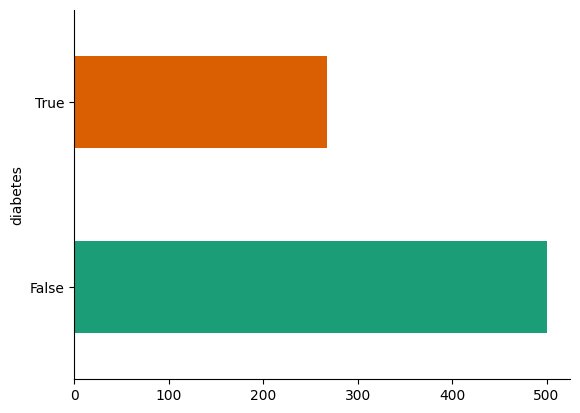

In [ ]:
# @title Gráfico para amostra de casos de verdadeiro para diabetes e falso

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('diabetes').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

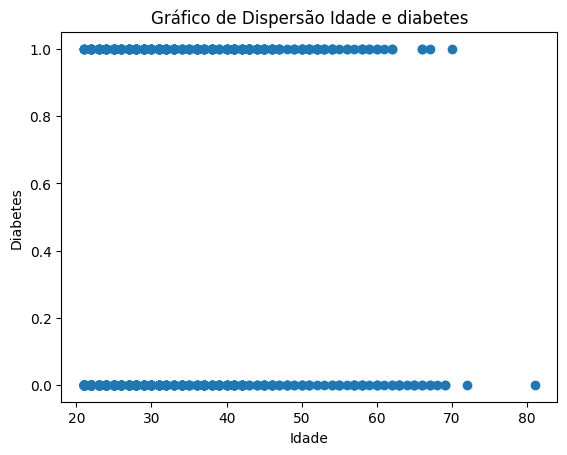

In [ ]:
# Dados aleatórios
# Plotando o gráfico
plt.scatter(df.age, df.diabetes)
plt.xlabel('Idade')
plt.ylabel('Diabetes')
plt.title('Gráfico de Dispersão Idade e diabetes')
plt.show()

In [ ]:
df.isnull().values.any() #valores nulos? Verifica valores nulos para manipular meu dataset

diabetes_map = {True : 1, False : 0} #definicao das classes

df['diabetes'] = df['diabetes'].map(diabetes_map) # Aplicando o mapeamento ao dataset mp converto
#verificando como os dados estao distribuidos
num_true = len(df.loc[df['diabetes'] == True])
num_false = len(df.loc[df['diabetes'] == False])
print("Casos Verdadeiros: {0} ({1:2.2f}%)".format(num_true, (num_true/ (num_true + num_false)) * 100))
print("Casos Falsos     : {0} ({1:2.2f}%)".format(num_false, (num_false/ (num_true + num_false)) * 100))


Casos Verdadeiros: 268 (34.90%)
Casos Falsos     : 500 (65.10%)


**Algoritmo Naive Bayes**



In [ ]:
# Seleção de variáveis preditoras (Feature Selection)
atributos = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']

# Variável a ser prevista target
atrib_prev = ['diabetes']

# Criando objetos
X = df[atributos].values
Y = df[atrib_prev].values

# Definindo a taxa de split
split_test_size = 0.30

# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = split_test_size, random_state = 42)
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(df.index)) * 100))

print("Casos verdadeiros originais: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]),
                                               (len(df.loc[df['diabetes'] ==1])/len(df.index) * 100)))

print("Casos falsos originais: {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]),
                                               (len(df.loc[df['diabetes'] == 0])/len(df.index) * 100)))
print("")
print("Casos verdadeiros trainos : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 1]),
                                               (len(Y_treino[Y_treino[:] == 1])/len(Y_treino) * 100)))

print("Casos falsos treinos : {0} ({1:0.2f}%)".format(len(Y_treino[Y_treino[:] == 0]),
                                               (len(Y_treino[Y_treino[:] == 0])/len(Y_treino) * 100)))
print("")
print("Testes verdadeiros : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 1]),
                                               (len(Y_teste[Y_teste[:] == 1])/len(Y_teste) * 100)))

print("Testes Falsos : {0} ({1:0.2f}%)".format(len(Y_teste[Y_teste[:] == 0]),
                                               (len(Y_teste[Y_teste[:] == 0])/len(Y_teste) * 100)))

69.92% nos dados de treino
30.08% nos dados de teste
Casos verdadeiros originais: 268 (34.90%)
Casos falsos originais: 500 (65.10%)

Casos verdadeiros trainos : 188 (35.01%)
Casos falsos treinos : 349 (64.99%)

Testes verdadeiros : 80 (34.63%)
Testes Falsos : 151 (65.37%)


In [ ]:
# Modelo usando algoritmo Naive Bayes
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

results = cross_validate(modelo_v1, X, Y, cv = 5)
nb_predict_test = modelo_v1.predict(X_teste)#previsoes variaveis preditoras

results = cross_validate(modelo_v1, X, Y, cv = 5)
desvio_padrao = results['test_score'].std()
print(results['test_score'])
media = results ['test_score'].mean()
print("Media = ",media)
print("Accuracy com cross validation, 5 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
print("Exatidão Naive Bayes(Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
#comparo treino com valores reais históricos
print()

[0.75324675 0.72727273 0.74675325 0.78431373 0.74509804]
Media =  0.7513368983957219
Accuracy com cross validation, 5 = [71.41, 78.85]
Exatidão Naive Bayes(Accuracy): 0.7446



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

**Matriz de Confusão Naive Bayes**



In [ ]:
# Criando uma Confusion Matrix
nb_predict_test = modelo_v1.predict(X_teste) #nunca foi treinado dados que ele n conhece
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 53  27]
 [ 32 119]]

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.66      0.64        80
           0       0.82      0.79      0.80       151

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



**Algoritmo Random Forest**


In [ ]:
# Modelo usando algoritmo Random Forest
#conjunto de arvore de precisao

modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(X_treino, Y_treino.ravel())#treino o modelo

# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(X_teste)
results = cross_validate(modelo_v2, X, Y, cv = 5)
print(results['test_score'])
media = results ['test_score'].mean()
print("Media = ",media)
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 5 = [%.2f, %.2f]" % ((media - 2 *desvio_padrao) * 100, (media + 2 * desvio_padrao) * 100))
print("Exatidão Random Forest(Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, rf_predict_test)))
print()

print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, rf_predict_test, labels = [1, 0]))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

[0.74025974 0.74675325 0.75974026 0.83660131 0.75163399]
Media =  0.7669977081741788
Accuracy com cross validation, 5 = [69.62, 83.78]
Exatidão Random Forest(Accuracy): 0.7532

Confusion Matrix
[[ 53  27]
 [ 30 121]]

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.66      0.65        80
           0       0.82      0.80      0.81       151

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



##Exploração métodos de classsificação Random Forest e Naive Bayes


Arquitetura de Naive Bayes e Random Forest para classificação de Diabetes: Uma análise Comparativa

Contexto:
Aprendizado de máquina é um método de análise de dados que visa classificar ações humanas na forma de predizer dados específicos e classificá-los. Com o desenvolvimento tecnológico cada vez mais estão sendo criados algoritmos para predizer um volume de dados cada vez maior.
O Brasil é o 5º país em incidência de diabetes no mundo, com 16,8 milhões de doentes adultos (20 a 79 anos) e a estimativa da incidência da doença em 2030 chega a 21,5 milhões. (Bvsms, 2023). Visto o aumento de pessoas com diabetes no Brasil, a demanda de classificação dos diagnósticos da doença está mais importante, visto assim o modelo de classificação desenvolvido é de grande importância.

###Problema:
Temos duas arquiteturas que serão comparadas em sua efetividade na classificação de pessoas diabéticas, Naive Bayes e Random Forest. O problema é classificá-las na melhor forma e mais eficiente possível.

##Hipótese:
Diante da comparação entre esses dois modelos de classificação, temos os seguintes cenários: Os algoritmos têm a mesma eficiência em ambas as partes, concluímos que ambos têm mesma efetividade. Supomos que o modelo Naive Bayes seja mais eficiente, logo concluímos que este modelo tem uma melhor performance nesse conjunto de dados, podemos supor a mesma análise se o modelo Random Forest tiver a melhor performance.
Esta avaliação será feita através do conjunto de dados públicos e métricas apropriadas para avaliação dos modelos.
##Motivação:
Com o crescente casos de diabetes é desafiador criar um modelo que possa ajudar na análise e predições de uma pessoa diabética ou não. A grande motivação deste trabalho é obter uma análise eficaz e performática e que ajude de alguma forma na classificação de diabéticos.

##Materiais:
#####Algoritmos Supervisionados
Neste ensaio são classificados dados entre dois algoritmos supervisionados, Naive Baayes e Random Forest tais algoritmos relacionam uma saída com uma entrada com bases em dados rotulados.  Os algoritmos determinam uma forma de prever qual rótulo de saída com base em uma entrada informada.
O algoritmo Naive Bayes pode ser descrito estatisticamente para cálculo de uma predição ele define uma tabela de probabilidades, em que consta a frequência dos preditores com relação às variáveis de saída. Então, o cálculo final leva em conta a probabilidade maior para oferecer uma solução

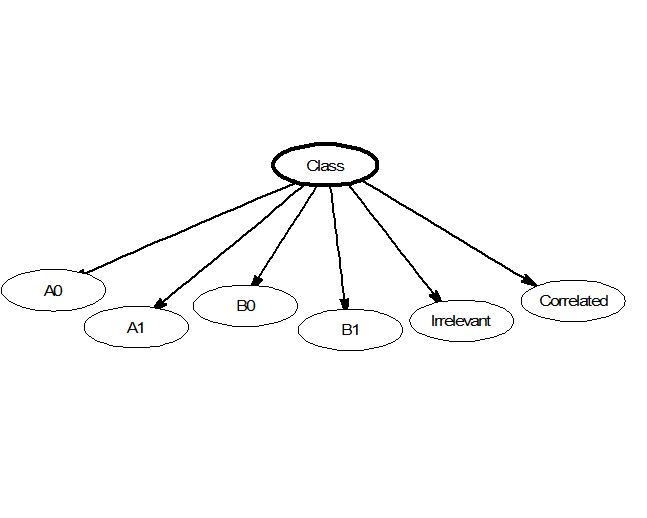

O algoritmo Random Forest cria árvores de decisão e combina o resultado de todas elas para concluir um resultado. Uma vantagem de utilizar o algoritmo Random Forest é que, além dele ser muito poderoso, ele retorna de maneira muito compreensiva a importância atribuída para cada variável independente na hora de realizar as predições.

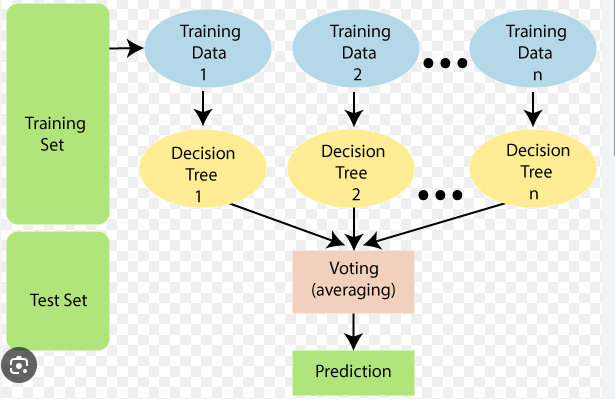

##Métodos:
Processamento dos dados

A preparação dos dados é uma etapa crucial no processo de aprendizado de máquina. Existem várias técnicas e etapas envolvidas nesse processo para garantir a qualidade e a eficácia dos dados utilizados no treinamento do modelo de machine learning.

A primeira etapa do processamento foi observar a base de dados, entendendo suas características usando a função. shape e . isnull().values.any() elas mostram a quantidade de linha no excel e a segunda função verifica valores nulos para manipular o Dataset.
Para a classificação de dados foi definido a saída que estava True e False para diabéticos como True = 1 e false = 0, assim defini as classes que vão ser classificadas. Em seguida para melhor entendimento, li os dados para entender a porcentagem de diabéticos que minha base de dados tem.

Implementação dos Algoritmos

Foi criado dados de treino e teste, dividido em 30% de teste e 70% de treino, é de extrema importância para o modelo uma grande porcentagem de treino para que o algoritmo na hora de classificá-lo ele tenha a melhor acurácia possível. foi usado a função fit(X, Y) para treinar meu modelo.
Para uma melhor acurácia foi usada a validção cruzada dividida em 5 partes, logo gerará cinco modelos, cinco fontes de dados para treinar os modelso, cinco fontes de dados para avaliar os modelos e cinco avaliações, uma para cada modelo, tornando meu algoritmo mais preciso e com o desvio padrão mais real.

A mesma forma de raciocinio foi desenvolvida para os dois modelos para compará-los.



##Resultados:
O algoritmo Naive Bayes teve sua classificação cruzada com seu desvio padrão na média entre [71.41 a 78.85]. A média das cinco classificações desse algoritmo deu entorno de 74.46%. Comparando com o algoritmo Random Forest que sua classificação cruzada esta entre [69.62 a 83.78] com média de acurácia entre 75.32% reparamos que tal algoritmo é mais eficiente que o Naive Bayes.

O F1-Score do Naive Bayes esta na média de 0.80 diferente do Random Forest que é em média 0.81.

##Conclusão:
Podemos concluir que o algoritmo Ramdon Forest nesse caso comparativo foi mais eficiente com uma porcentagem de 1% de eficiência, porcentagem miníma que em uma base de dados mais robusta esta porcentagem poderia ser maior. As arquiteturas foram implementadas e treinadas com sucesso, gerando modelos com resultados comparáveis.


##Referências:

https://blog.somostera.com/data-science/naive-bayes

https://bvsms.saude.gov.br/26-6-dia-nacional-do-diabetes-4/

https://fontana.paginas.ufsc.br/files/2018/03/apostila_ML_pt2.pdf
